In [3]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-12-09T21:36:10-06:00

CPython 3.7.0
IPython 6.5.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.15.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [4]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")

df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
%matplotlib notebook

In [6]:
import matplotlib.pyplot as plt
import matplotlib

<IPython.core.display.Javascript object>


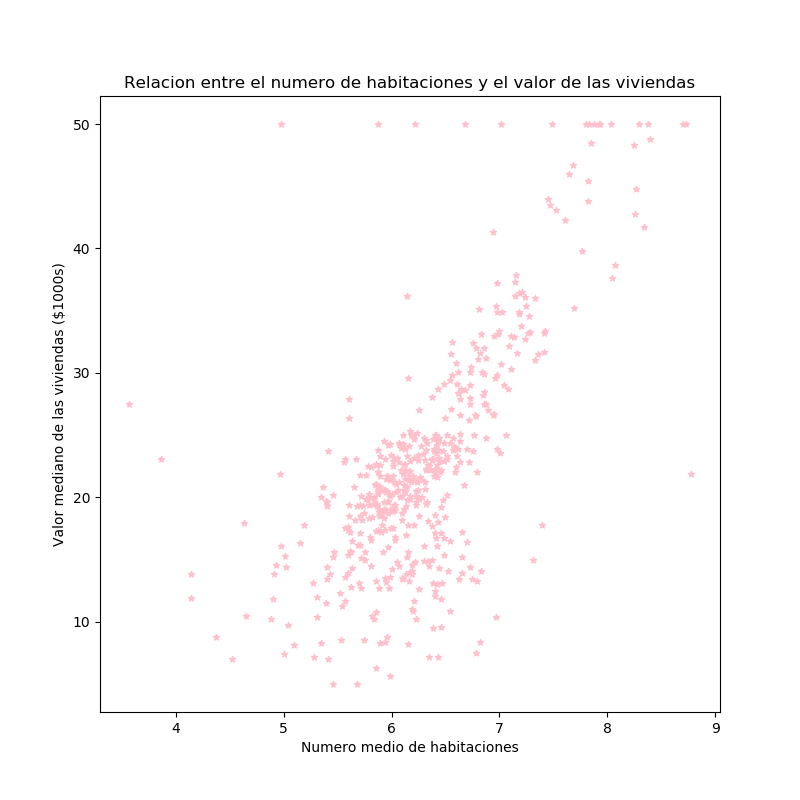

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [7]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink", figsize=(8,8))

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [8]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,8)

<IPython.core.display.Javascript object>


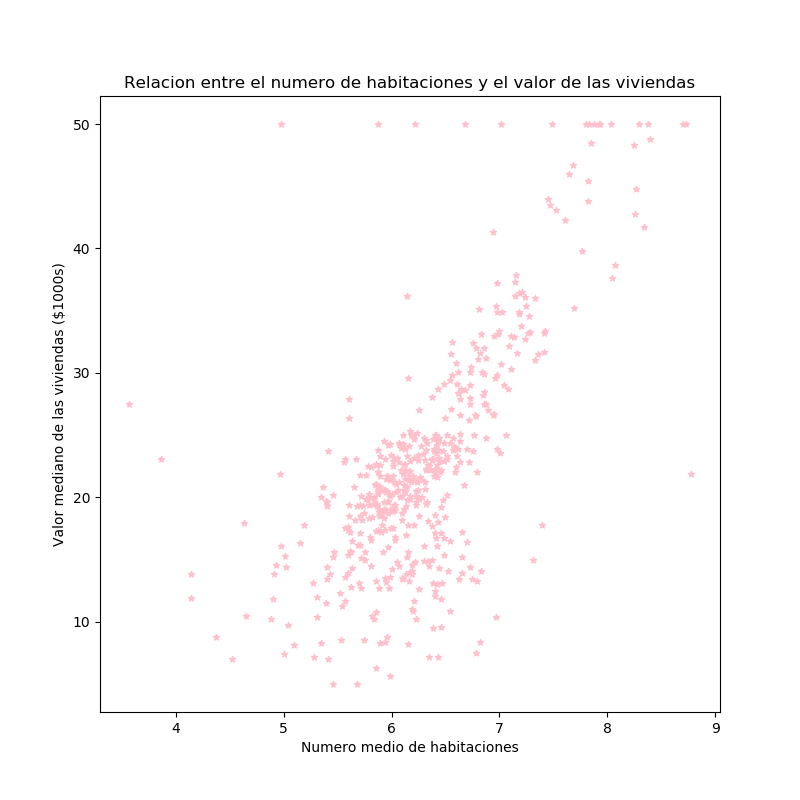

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [9]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [10]:
plt.style.available

['seaborn-poster',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-pastel',
 'grayscale',
 'seaborn',
 '_classic_test',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'ggplot',
 'seaborn-dark',
 'fast',
 'seaborn-talk',
 'seaborn-colorblind',
 'seaborn-paper',
 'fivethirtyeight',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-bright',
 'tableau-colorblind10',
 'classic',
 'seaborn-darkgrid',
 'bmh',
 'seaborn-muted',
 'seaborn-notebook']

In [11]:
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>


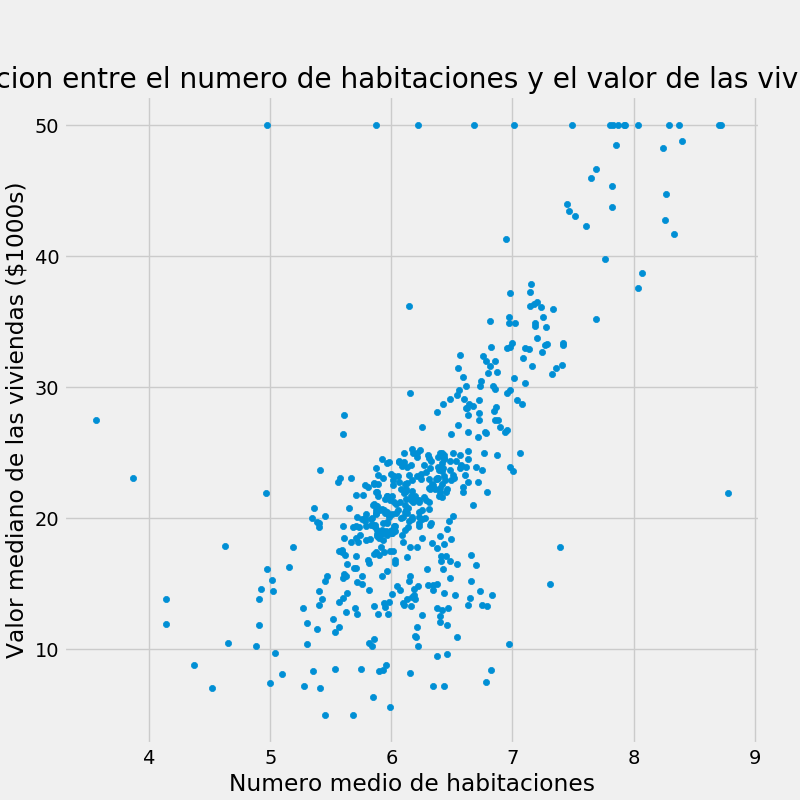

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [12]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [13]:
from ipywidgets import interact

In [14]:
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y="VALOR_MEDIANO")
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


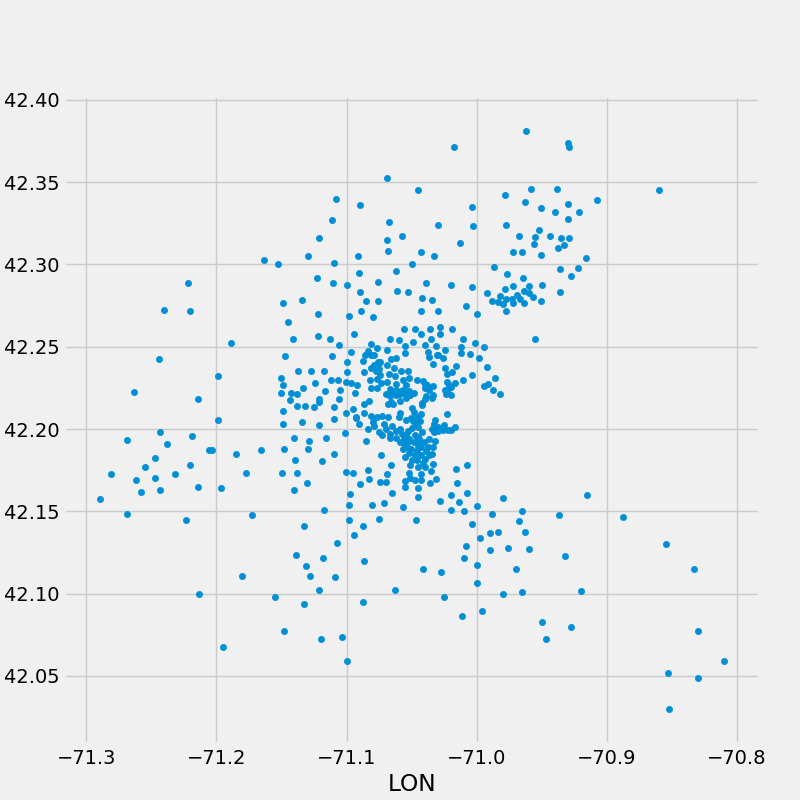

In [16]:
df.plot.scatter(x="LON", y="LAT")

In [17]:
import cartopy.crs as ccrs

from cartopy.io import img_tiles

<IPython.core.display.Javascript object>


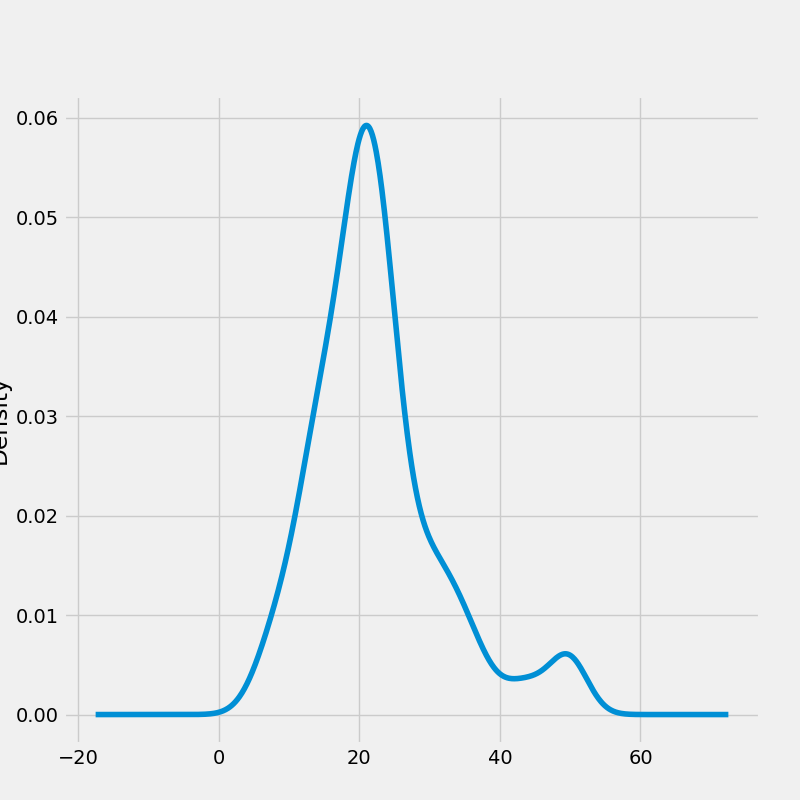

In [18]:
df.VALOR_MEDIANO.plot.kde()

In [19]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
primer_quintil

15.3

In [20]:
cuarto_quintil = df.VALOR_MEDIANO.quantile(0.8)
cuarto_quintil

28.2

<IPython.core.display.Javascript object>


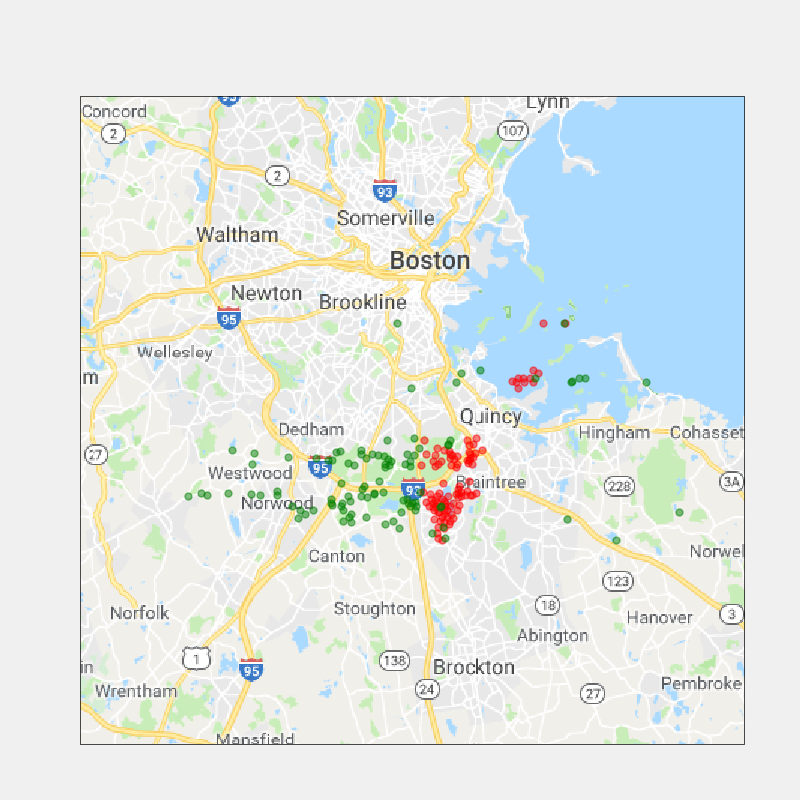

In [22]:
imagery = img_tiles.GoogleTiles()


ax = plt.axes(projection=imagery.crs)

limites_mapa = (-71.38 ,-70.77,42.03 , 42.47)

ax.set_extent(limites_mapa)

ax.add_image(imagery, 10)

df_primer_qt = df[df.VALOR_MEDIANO<primer_quintil]

df_tercer_qt = df[df.VALOR_MEDIANO>cuarto_quintil]


plt.plot(df_primer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="red", linewidth=0, alpha=0.5)

plt.plot(df_tercer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), marker=".",
         markersize=10, color="green", linewidth=0, alpha=0.5)

plt.show()

In [24]:
import seaborn as sns

<IPython.core.display.Javascript object>


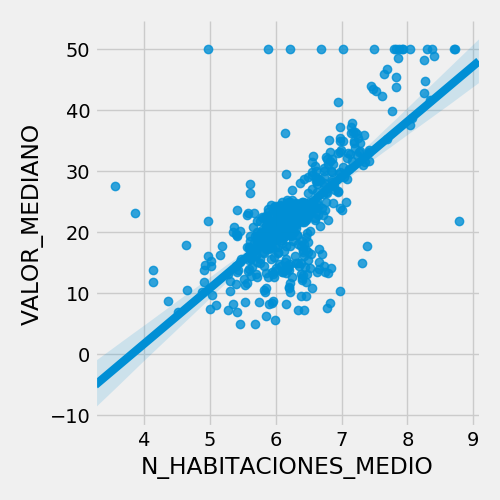

/home/erdvillegas/anaconda3/envs/Datascientist/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [26]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df)

In [30]:
%matplotlib inline

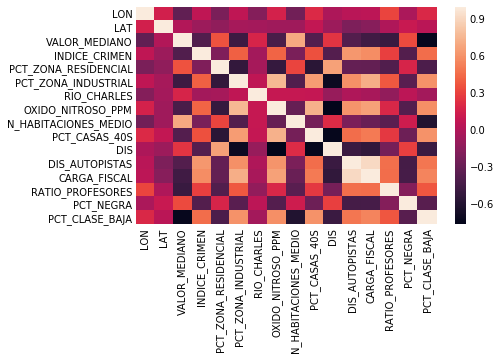

In [31]:
sns.heatmap(df.corr())

In [32]:
import bokeh.plotting as bk

bk.output_notebook()

Loading BokehJS ...

In [34]:
df.INDICE_CRIMEN

0       0.00632
1       0.02731
2       0.02729
3       0.03237
4       0.06905
5       0.02985
6       0.08829
7       0.14455
8       0.21124
9       0.17004
10      0.22489
11      0.11747
12      0.09378
13      0.62976
14      0.63796
15      0.62739
16      1.05393
17      0.78420
18      0.80271
19      0.72580
20      1.25179
21      0.85204
22      1.23247
23      0.98843
24      0.75026
25      0.84054
26      0.67191
27      0.95577
28      0.77299
29      1.00245
         ...   
476     4.87141
477    15.02340
478    10.23300
479    14.33370
480     5.82401
481     5.70818
482     5.73116
483     2.81838
484     2.37857
485     3.67367
486     5.69175
487     4.83567
488     0.15086
489     0.18337
490     0.20746
491     0.10574
492     0.11132
493     0.17331
494     0.27957
495     0.17899
496     0.28960
497     0.26838
498     0.23912
499     0.17783
500     0.22438
501     0.06263
502     0.04527
503     0.06076
504     0.10959
505     0.04741
Name: INDICE_CRIMEN, Len

In [35]:
df["CRIMEN_QUINTIL"] = pd.qcut(df.INDICE_CRIMEN, 5)
df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA,CRIMEN_QUINTIL
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,"(0.00532, 0.0642]"
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,"(0.00532, 0.0642]"
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,"(0.00532, 0.0642]"
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,"(0.00532, 0.0642]"
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,"(0.0642, 0.15]"


In [41]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]]
              closed='right',
              dtype='interval[float64]')

In [37]:
from bokeh.palettes import brewer

colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c']

In [42]:
p = bk.figure(
plot_width=600,
    plot_height=600,
    title="Habitaciones vs Valor vivienda vs crimen"
)

for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
    df_q = df[df.CRIMEN_QUINTIL==quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, color=colors[i],
             legend="({}-{})".format(quintil.left, quintil.right)
             )
    
bk.show(p);

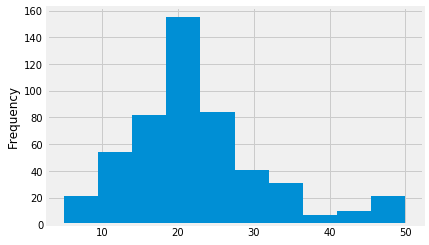

In [43]:
df.VALOR_MEDIANO.plot.hist()

In [48]:
import numpy as np

hist, edges = np.histogram(df.VALOR_MEDIANO, bins=20)

In [45]:
hist

array([ 9, 12, 18, 36, 41, 41, 84, 71, 72, 12, 23, 18, 17, 14,  6,  1,  5,
        5,  2, 19])

In [46]:
edges

array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
       25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
       45.5 , 47.75, 50.  ])

In [49]:
p1 = bk.figure(title="Histograma valor viviendas", tools="save,hover,reset", background_fill_color="#E8DDCB")



p1.quad(top=hist,bottom=0, left=edges[:-1], right=edges[1:], fill_color="#026560")

bk.show(p1)

In [53]:
from altair import Chart, Color, Scale

In [52]:
chart = Chart(df)

scale = Scale(range=['#996666', '#b34d4d', '#cc3333','#e61919','#ff0000'])


chart.mark_point().encode(
x="N_HABITACIONES_MEDIO",
    y="VALOR_MEDIANO",
    color=Color("CRIMEN_QUINTIL", scale=scale)
)

TypeError: Object of type Interval is not JSON serializable

Chart({
  data:                   CIUDAD      LON      LAT  VALOR_MEDIANO  INDICE_CRIMEN  \
  0                 Nahant -70.9550  42.2550           24.0        0.00632   
  1             Swampscott -70.9500  42.2875           21.6        0.02731   
  2             Swampscott -70.9360  42.2830           34.7        0.02729   
  3             Marblehead -70.9280  42.2930           33.4        0.03237   
  4             Marblehead -70.9220  42.2980           36.2        0.06905   
  5             Marblehead -70.9165  42.3040           28.7        0.02985   
  6                  Salem -70.9360  42.2970           22.9        0.08829   
  7                  Salem -70.9375  42.3100           22.1        0.14455   
  8                  Salem -70.9330  42.3120           16.5        0.21124   
  9                  Salem -70.9290  42.3160           18.9        0.17004   
  10                 Salem -70.9350  42.3160           15.0        0.22489   
  11                 Salem -70.9440  42.3170      